In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import numpy as np

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:

df[0].value_counts()

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
                    ... 
cauliflower            1
ketchup                1
cream                  1
body spray             1
oatmeal                1
Name: 0, Length: 115, dtype: int64

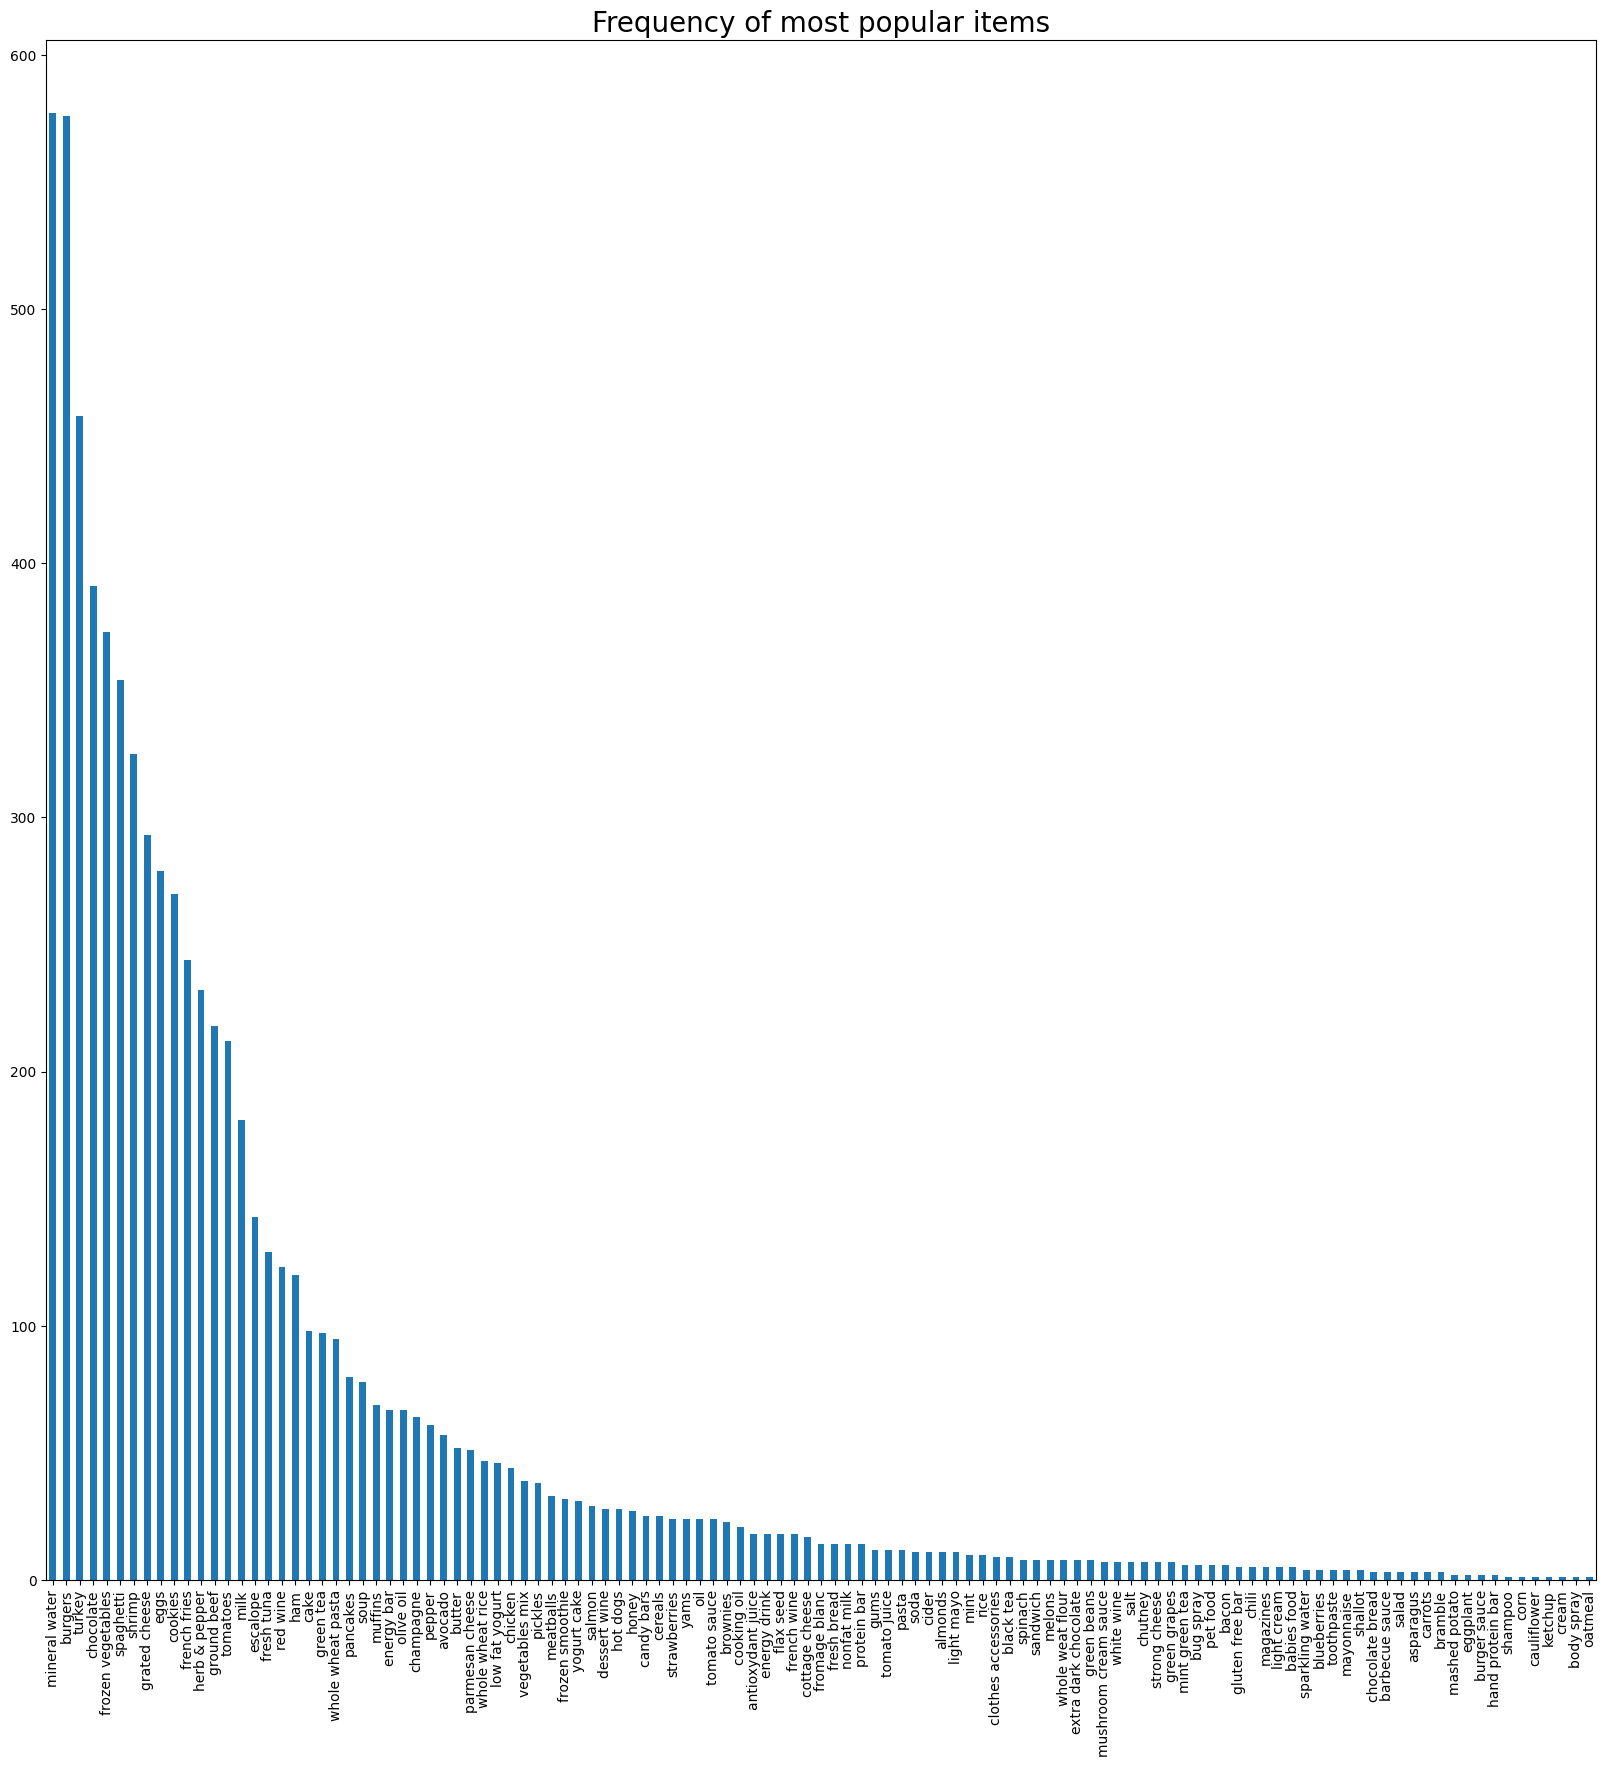

In [5]:
df[0].value_counts().plot.bar(figsize=(20,20))
plt.title('Frequency of most popular items',fontsize=20)
plt.show()

In [6]:
transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, 20) if str(df.values[i,j])!='nan'])
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [7]:
rules = apriori(transactions,min_support=0.003,min_confidence=0.01,min_lift=3,min_length=2)
values = list(rules)
values

[RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [8]:
rules = []
for item in values:
    pair = item[0]
    items = [x for x in pair]
    rules.append([str(items[0]+" -> " + items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
rules

[['brownies -> cottage cheese',
  '0.0034662045060658577',
  '0.10276679841897232',
  '3.225329518580382'],
 ['chicken -> light cream',
  '0.004532728969470737',
  '0.07555555555555556',
  '4.843950617283951'],
 ['escalope -> mushroom cream sauce',
  '0.005732568990801226',
  '0.0722689075630252',
  '3.7908326967150496'],
 ['pasta -> escalope',
  '0.005865884548726837',
  '0.07394957983193277',
  '4.700811850163794'],
 ['tomato juice -> fresh bread',
  '0.004266097853619517',
  '0.09907120743034055',
  '3.2593558198902826'],
 ['fresh tuna -> honey',
  '0.003999466737768298',
  '0.17964071856287428',
  '3.7850703088205613'],
 ['honey -> fromage blanc',
  '0.003332888948140248',
  '0.2450980392156863',
  '5.164270764485569'],
 ['herb & pepper -> ground beef',
  '0.015997866951073192',
  '0.1628222523744912',
  '3.291993841134928'],
 ['tomato sauce -> ground beef',
  '0.005332622317024397',
  '0.054274084124830396',
  '3.840659481324083'],
 ['olive oil -> light cream',
  '0.00319957339021

In [9]:
table = pd.DataFrame(rules,columns=['Rule','Support','Confidence','Lift'])

In [10]:
table

,Rule,Support,Confidence,Lift
0,brownies -> cottage cheese,0.0034662045060658577,0.10276679841897232,3.225329518580382
1,chicken -> light cream,0.004532728969470737,0.07555555555555556,4.843950617283951
2,escalope -> mushroom cream sauce,0.005732568990801226,0.0722689075630252,3.7908326967150496
3,pasta -> escalope,0.005865884548726837,0.07394957983193277,4.700811850163794
4,tomato juice -> fresh bread,0.004266097853619517,0.09907120743034055,3.2593558198902826
...,...,...,...,...
89,mineral water -> spaghetti,0.0030662578322890282,0.21100917431192662,3.532990661861075
90,mineral water -> spaghetti,0.0030662578322890282,0.03120759837177748,3.344117076952898
91,olive oil -> mineral water,0.003332888948140248,0.05060728744939272,3.216993755575379
92,mineral water -> milk,0.0030662578322890282,0.0638888888888889,3.014028651292803


In [11]:
table.sort_values(by=['Support'],ascending=False)

,Rule,Support,Confidence,Lift
7,herb & pepper -> ground beef,0.015997866951073192,0.1628222523744912,3.291993841134928
30,spaghetti -> ground beef,0.008665511265164644,0.08819538670284939,3.165328208890303
51,mineral water -> milk,0.008532195707239034,0.16886543535620052,3.518498973907945
10,olive oil -> whole wheat pasta,0.007998933475536596,0.12145748987854252,4.1224100976422955
34,mineral water -> shrimp,0.007199040127982935,0.07552447552447553,3.2006163328197226
...,...,...,...,...
41,green tea -> ground beef,0.0030662578322890282,0.04483430799220273,3.0297490472929067
49,spaghetti -> tomato sauce,0.0030662578322890282,0.03120759837177748,4.980599901844742
55,milk -> soup,0.0030662578322890282,0.02366255144032922,3.4133230452674903
62,whole wheat rice -> spaghetti,0.0030662578322890282,0.04483430799220273,3.1726617382029496


In [12]:
table.sort_values(by=['Confidence'],ascending=False)

,Rule,Support,Confidence,Lift
11,pasta -> shrimp,0.005065991201173177,0.3220338983050847,4.506672147735896
6,honey -> fromage blanc,0.003332888948140248,0.2450980392156863,5.164270764485569
89,mineral water -> spaghetti,0.0030662578322890282,0.21100917431192662,3.532990661861075
50,mineral water -> spaghetti,0.003199573390214638,0.20512820512820515,3.4345238095238098
9,olive oil -> light cream,0.003199573390214638,0.20512820512820515,3.1147098515519573
...,...,...,...,...
75,mineral water -> milk,0.0037328356219170776,0.02880658436213992,3.177620430888405
53,olive oil -> milk,0.0035995200639914677,0.02777777777777778,3.1098673300165838
12,milk -> avocado,0.003332888948140248,0.025720164609053502,3.2154492455418384
52,olive oil -> milk,0.003199573390214638,0.02469135802469136,3.0362274843149164


In [13]:
table.sort_values(by=['Lift'],ascending=False)

,Rule,Support,Confidence,Lift
58,olive oil -> mineral water,0.0038661511798426876,0.058704453441295545,6.115862573099415
6,honey -> fromage blanc,0.003332888948140248,0.2450980392156863,5.164270764485569
49,spaghetti -> tomato sauce,0.0030662578322890282,0.03120759837177748,4.980599901844742
1,chicken -> light cream,0.004532728969470737,0.07555555555555556,4.843950617283951
3,pasta -> escalope,0.005865884548726837,0.07394957983193277,4.700811850163794
...,...,...,...,...
70,mineral water -> chocolate,0.0041327822956939075,0.1802325581395349,3.0176884343853825
92,mineral water -> milk,0.0030662578322890282,0.0638888888888889,3.014028651292803
36,spaghetti -> shrimp,0.005999200106652446,0.08395522388059701,3.013148968078269
71,milk -> mineral water,0.003332888948140248,0.14450867052023122,3.0109987154784847
